## 1. 라이브러리 임포트 및 경로 설정

In [1]:
# 1) 라이브러리 임포트
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 시각화 스타일 설정
sns.set_theme(style="whitegrid")  

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
if not os.path.exists(font_path):
    print(f"Font file not found at {font_path}")
font_prop = fm.FontProperties(fname=font_path)

# 2) AFAD 데이터셋 최상위 경로 설정
root_dir = "/mnt/disk3/face_age_gender_estimation/AFAD-Full"  # 실제 AFAD 데이터 경로로 변경

## 2. 데이터프레임 만들기

In [2]:
# AFAD 데이터셋의 이미지들을 전부 찾고, age/gender 정보를 추출해 DataFrame 생성

all_image_paths = glob.glob(os.path.join(root_dir, "*", "*", "*.jpg"))

records = []
for img_path in all_image_paths:
    # 예: /path/to/AFAD/20/111/XXX.jpg
    parts = img_path.split(os.sep)
    age_str = parts[-3]      # "20"
    gender_str = parts[-2]   # "111" or "112"
    
    # 성별 코드 변환: 111 -> 남(0), 112 -> 여(1)
    gender = 0 if gender_str == "111" else 1
    
    age = int(age_str)
    
    records.append({"image_path": img_path, "age": age, "gender": gender})

df = pd.DataFrame(records)
df.head()

,image_path,age,gender
0,/mnt/disk3/face_age_gender_estimation/AFAD-Ful...,44,0
1,/mnt/disk3/face_age_gender_estimation/AFAD-Ful...,44,0
2,/mnt/disk3/face_age_gender_estimation/AFAD-Ful...,44,0
3,/mnt/disk3/face_age_gender_estimation/AFAD-Ful...,44,0
4,/mnt/disk3/face_age_gender_estimation/AFAD-Ful...,44,0


In [3]:
df.info() 
# df 컬럼
# image_path: 이미지 파일 경로
# age: 나이 (정수)
# gender: 0=남성, 1=여성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165501 entries, 0 to 165500
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   image_path  165501 non-null  object
 1   age         165501 non-null  int64 
 2   gender      165501 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.8+ MB


## 3. 기본 통계 정보 확인

In [4]:
# 데이터 개수, 컬럼 형식, 누락 데이터 등 간단히 체크
print("데이터프레임 크기:", df.shape)
print()
print(df.info())
print()
print(df.describe())


데이터프레임 크기: (165501, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165501 entries, 0 to 165500
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   image_path  165501 non-null  object
 1   age         165501 non-null  int64 
 2   gender      165501 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.8+ MB
None

                 age         gender
count  165501.000000  165501.000000
mean       25.744062       0.386596
std         6.448671       0.486971
min        15.000000       0.000000
25%        21.000000       0.000000
50%        24.000000       0.000000
75%        30.000000       1.000000
max        72.000000       1.000000


## 4. 성별 분포 확인

/tmp/ipykernel_2643463/243049699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) De

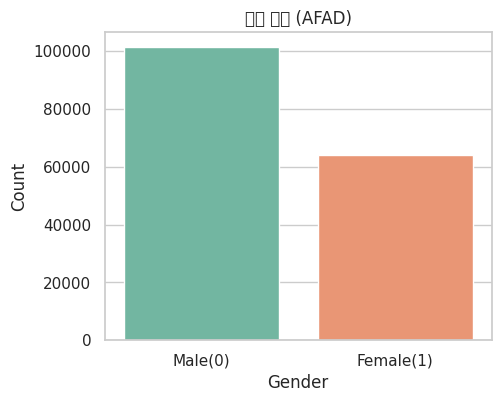

남성 이미지 수: 101519
여성 이미지 수: 63982


In [6]:
# 성별 컬럼값이 0(남성), 1(여성)으로 되어있음
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(5, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
plt.xticks([0,1], ['Male(0)', 'Female(1)'])
plt.title("성별 분포 (AFAD)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("남성 이미지 수:", gender_counts[0])
print("여성 이미지 수:", gender_counts[1])

## 5. 나이 분포 확인

/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


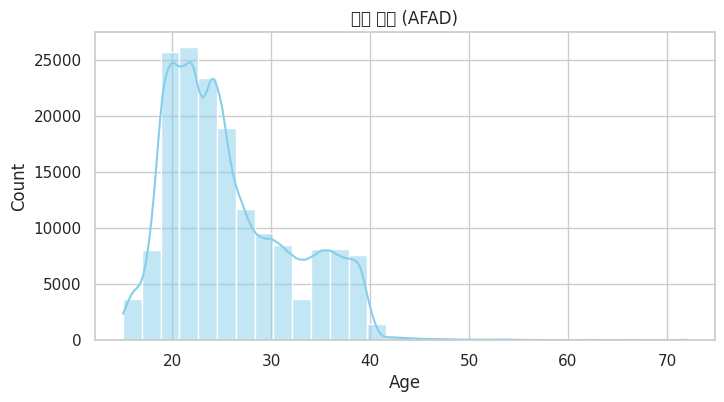

In [7]:
plt.figure(figsize=(8, 4))
# 나이가 많을 수 있으므로 bins를 적절히 조정, kde 곡선을 켜서 대략적인 분포 형태를 확인
sns.histplot(data=df, x='age', kde=True, color="skyblue", bins=30)
plt.title("나이 분포 (AFAD)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## 6. 나이별 성별 분포 (Grouped)

/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

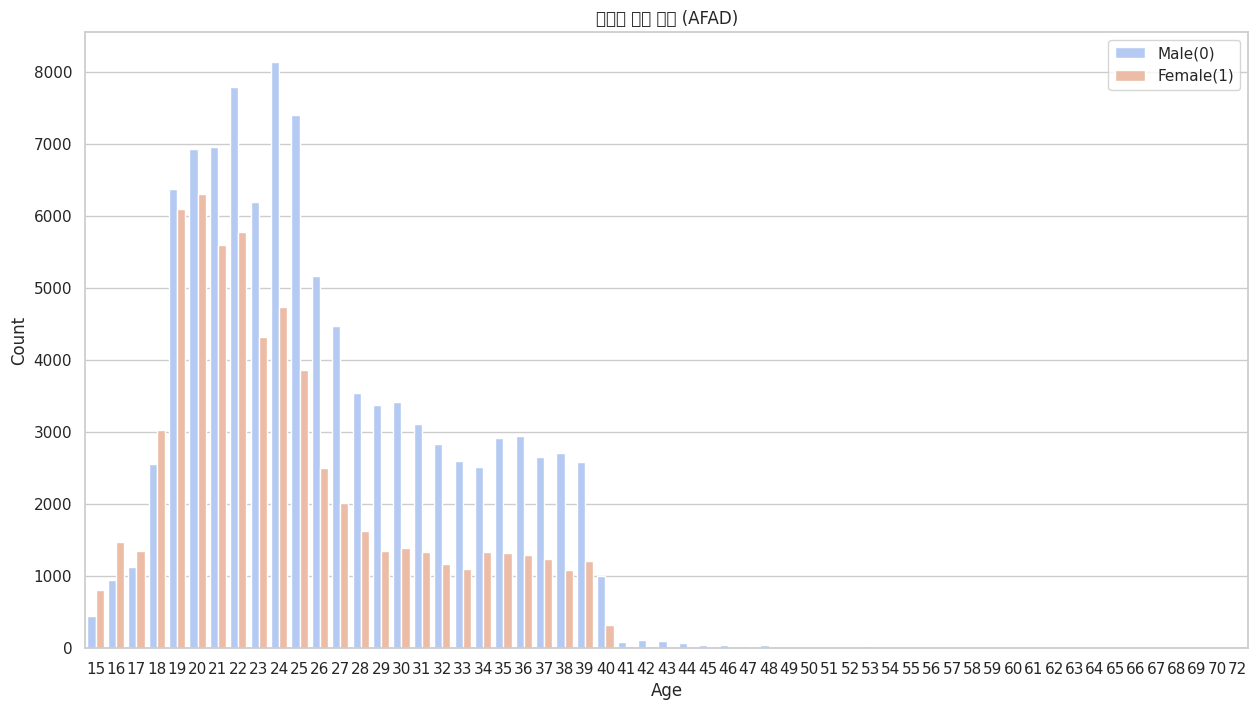

In [9]:
plt.figure(figsize=(15, 8))

# age를 x축, gender를 hue로 하여 countplot
sns.countplot(data=df, x='age', hue='gender', palette="coolwarm")

plt.title("나이별 성별 분포 (AFAD)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(labels=["Male(0)", "Female(1)"])
plt.show()


## 7. 피벗 & 히트맵(Heatmap) 시각화 

/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hs-ai-server/workspace/face_age_estimation_train/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

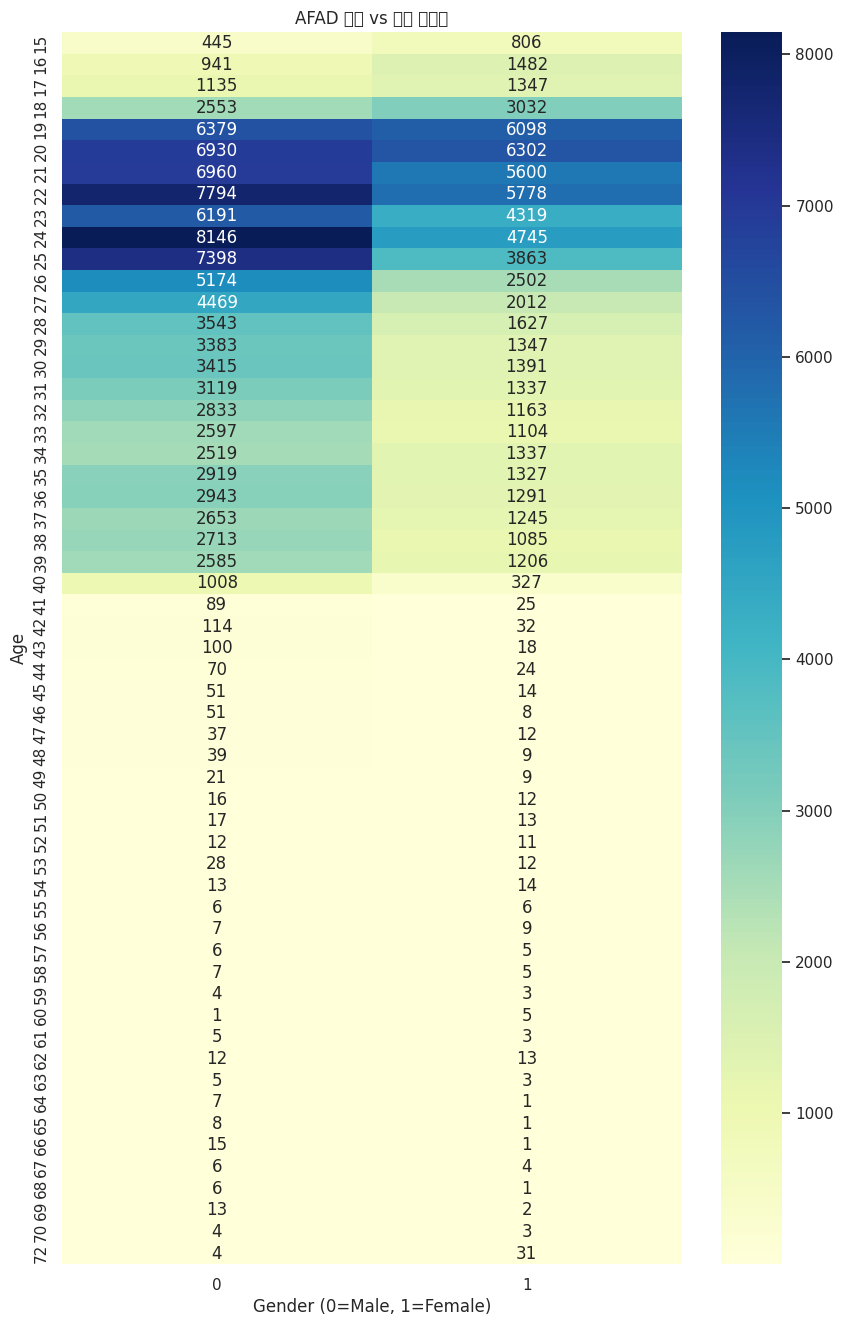

In [11]:
# age, gender 조합에 대한 카운트를 피벗 테이블로 만들어서 히트맵 시각화해볼 수 있음
pivot_df = df.groupby(["age", "gender"]).size().reset_index(name="count")
pivot_df = pivot_df.pivot(index="age", columns="gender", values="count").fillna(0)

plt.figure(figsize=(10, 16))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("AFAD 나이 vs 성별 히트맵")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Age")
plt.show()

In [12]:
print("요약:")
print(f"- 전체 이미지 개수: {len(df)}")
print(f"- 성별(남성): {sum(df['gender'] == 0)}, 성별(여성): {sum(df['gender'] == 1)}")
print(f"- 나이 최솟값: {df['age'].min()}, 나이 최댓값: {df['age'].max()}")

요약:
- 전체 이미지 개수: 165501
- 성별(남성): 101519, 성별(여성): 63982
- 나이 최솟값: 15, 나이 최댓값: 72

성별/나이에 대한 편중 여부는 위 시각화를 통해 확인할 수 있습니다.
